## Практическое задание  1



<ol>
    <li>Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?</li>
</ol>

In [1]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


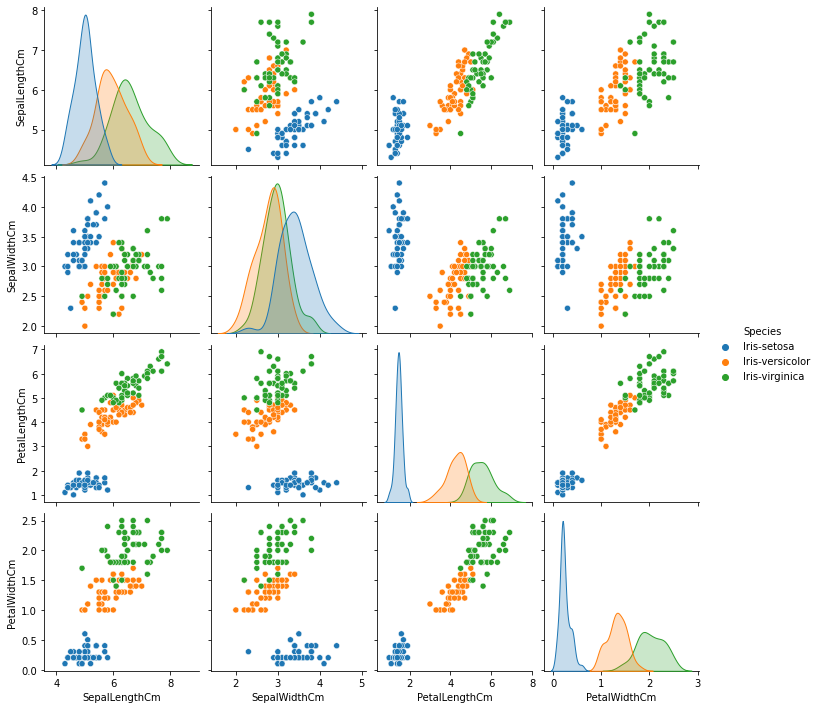

In [21]:

### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

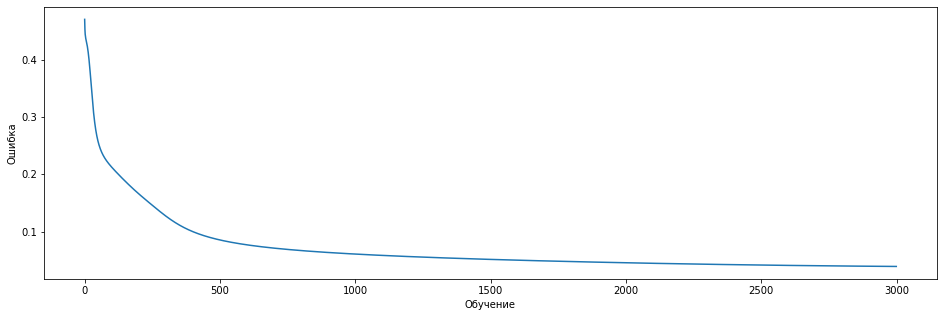

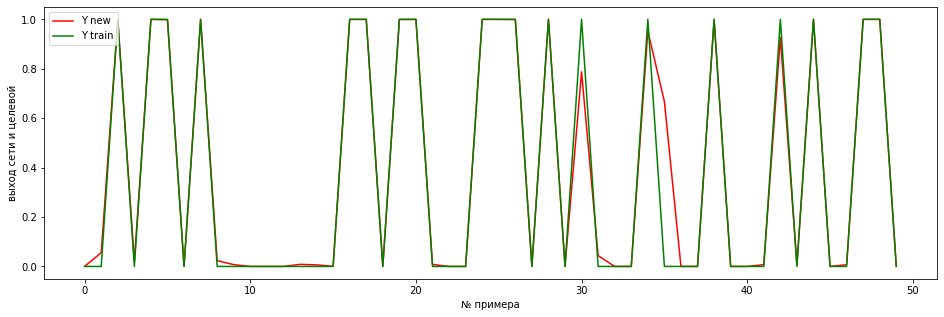

Аккуратность нейронной сети 96.09%


In [22]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5


# присваевание случайных весов



w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(3000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")



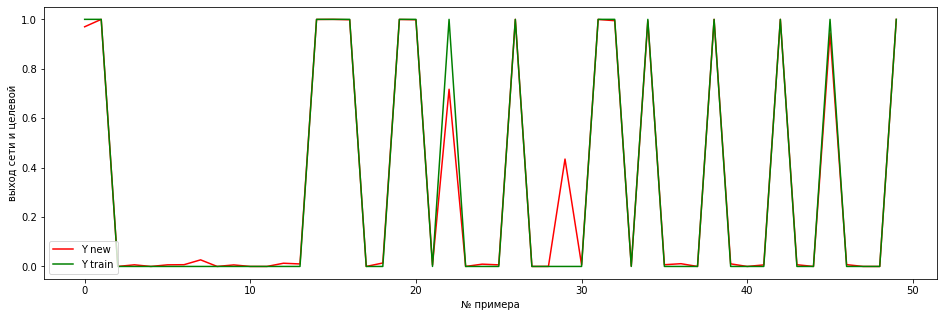

Аккуратность нейронной сети на тесте 97.46%


In [23]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

------

Создадим функцию для расчета

Для тогочтобы были сравнимы резульаты зададим random.seed(42)


In [29]:
def nn_fit(X_train, neuron_numb = 5, n_estimators = 3000, learning_rate = 0.1):
    np.random.seed(42)
    w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # скорость обучения (learning rate)
    n = learning_rate
    # процесс обучения
    for i in range(n_estimators):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n
        # метрика модели
    error = np.mean(np.abs(layer2_error))
    accuracy = (1 - error) * 100
    return (accuracy, error, w0, w1)
def nn_predict(X_test, w0, w1):
    layer0_t = X_test
    layer1_t = sigmoid(np.dot(layer0_t, w0))
    layer2_t = sigmoid(np.dot(layer1_t, w1))
    layer2_error_t = y_test - layer2_t
    error_t = np.mean(np.abs(layer2_error_t))
    accuracy_t = (1 - error_t) * 100
    return (accuracy_t, error_t)


Проверим на параметрах по умолчанию

In [30]:
result = nn_fit(X_train)
result_test = nn_predict(X_test,result[2],result[3])
print("Аккуратность нейронной сети " + str(round(result[0],2)) + "%")
print("Аккуратность нейронной сети на тесте " + str(round(result_test[0],2)) + "%")

Аккуратность нейронной сети 96.05%
Аккуратность нейронной сети на тесте 97.43%


#### Зависимость от neuron_numbers

In [8]:
neuron_numbers = [3,4,5,6, 7,10,15,25]
df = pd.DataFrame(neuron_numbers, columns = ['neuron_numb'])
df['accuracy_train'] = 0.0
df['accuracy_test'] = 0.0
for i in neuron_numbers:
    result = nn_fit(X_train, neuron_numb = i)
    result_test = nn_predict(X_test,result[2],result[3])
    df.loc[df['neuron_numb'] == i, 'accuracy_train'] = round(result[0],2)
    df.loc[df['neuron_numb'] == i, 'accuracy_test'] = round(result_test[0],2)
df

,neuron_numb,accuracy_train,accuracy_test
0,3,96.94,97.94
1,4,96.32,96.18
2,5,96.52,97.75
3,6,96.80,97.84
4,7,95.97,96.95
5,10,95.65,97.27
6,15,96.15,97.03
7,25,95.68,97.17


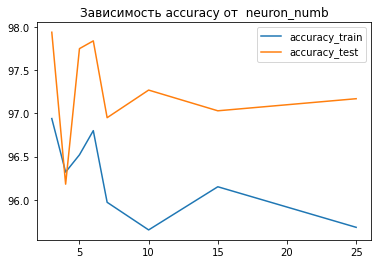

In [9]:
plt.plot(df['neuron_numb'],df['accuracy_train'],label = 'accuracy_train')
plt.plot(df['neuron_numb'],df['accuracy_test'],label = 'accuracy_test')
plt.title(f'Зависимость accuracy от  {df.columns[0]}')
plt.legend()
plt.show() 


__Вывод:__

Точность сначала меняется резко а потом начиная с 7 рост небольшой и потом совсем начинается падение

Максимум при neuron_numb = 6

-----

#### Зависимость  от n_estimators

In [10]:
n_estimators = [50, 100, 1000, 2000, 3000, 4000,5000, 7000]
df1 = pd.DataFrame(n_estimators, columns = ['n_estimators'])
df1['accuracy_train'] = 0.0
df1['accuracy_test'] = 0.0
for i in n_estimators:
    result = nn_fit(X_train, neuron_numb = 6, n_estimators = i)
    result_test = nn_predict(X_test,result[2],result[3])
    df1.loc[df1['n_estimators'] == i, 'accuracy_train'] = round(result[0],2)
    df1.loc[df1['n_estimators'] == i, 'accuracy_test'] = round(result_test[0],2)
df1

,n_estimators,accuracy_train,accuracy_test
0,50,72.62,74.47
1,100,77.42,79.25
2,1000,94.04,94.35
3,2000,96.33,97.34
4,3000,96.80,97.84
5,4000,96.61,97.57
6,5000,96.63,97.59
7,7000,96.65,97.60


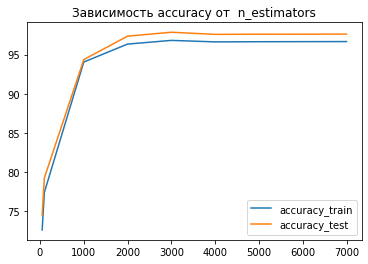

In [11]:
plt.plot(df1['n_estimators'],df1['accuracy_train'],label = 'accuracy_train')
plt.plot(df1['n_estimators'],df1['accuracy_test'],label = 'accuracy_test')
plt.title(f'Зависимость accuracy от  {df1.columns[0]}')
plt.legend()
plt.show() 

__Вывод:__

до 1000 идет резкое увеличение точности, затем более медленное. точка насыщения примерно на n ~ 2000-3000

-----

#### Зависимость  от learning_rate

In [12]:
learning_rates = [1,0.1,0.05,0.01]
df2 = pd.DataFrame(learning_rates, columns = ['learning_rate'])
df2['accuracy_train'] = 0.0
df2['accuracy_test'] = 0.0
for i in learning_rates:
    result = nn_fit(X_train, neuron_numb = 6, learning_rate = i)
    result_test = nn_predict(X_test,result[2],result[3])
    df2.loc[df2['learning_rate'] == i, 'accuracy_train'] = round(result[0],2)
    df2.loc[df2['learning_rate'] == i, 'accuracy_test'] = round(result_test[0],2)
df2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


,learning_rate,accuracy_train,accuracy_test
0,1.00,71.95,81.00
1,0.10,96.80,97.84
2,0.05,95.56,96.33
3,0.01,87.52,88.30


При уменьшении шага точность вроде как падает но она связана с тем что надо увеличить количество итераций

сделаем зависимость количества итерации от шага

In [13]:
learning_rates = [1, 0.5, 0.2, 0.1, 0.075, 0.05, 0.025, 0.01]
df2 = pd.DataFrame(learning_rates, columns = ['learning_rate'])
df2['accuracy_train'] = 0.0
df2['accuracy_test'] = 0.0
for i in learning_rates:
    n_est = int(300/i)
    result = nn_fit(X_train, neuron_numb = 6,  n_estimators = n_est , learning_rate = i)
    result_test = nn_predict(X_test,result[2],result[3])
    df2.loc[df2['learning_rate'] == i, 'accuracy_train'] = round(result[0],2)
    df2.loc[df2['learning_rate'] == i, 'accuracy_test'] = round(result_test[0],2)
df2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


,learning_rate,accuracy_train,accuracy_test
0,1.000,70.20,80.54
1,0.500,94.58,95.69
2,0.200,95.08,96.26
3,0.100,96.80,97.84
4,0.075,96.74,97.83
5,0.050,96.74,97.83
6,0.025,96.73,97.82
7,0.010,96.73,97.82


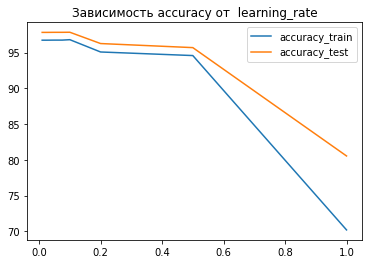

In [14]:
plt.plot(df2['learning_rate'],df2['accuracy_train'],label = 'accuracy_train')
plt.plot(df2['learning_rate'],df2['accuracy_test'],label = 'accuracy_test')
plt.title(f'Зависимость accuracy от  {df2.columns[0]}')
plt.legend()
plt.show() 

__Вывод:__

Точность при большом шаге плохая, перелом происходит на 0.5 в тсорону уменьшения, после чего заметно увеличение точности, но когда шаг становится меньше 0.1 то разница в точности незаметна

оптимальное значение 0.1

In [15]:
result = nn_fit(X_train, neuron_numb = 6, n_estimators = 3000, learning_rate = 0.1)
result_test = nn_predict(X_test,result[2],result[3])
print("Аккуратность нейронной сети " + str(round(result[0],2)) + "%")
print("Аккуратность нейронной сети на тесте " + str(round(result_test[0],2)) + "%")

Аккуратность нейронной сети 96.8%
Аккуратность нейронной сети на тесте 97.84%


-----

#### Построим 3х слойную сеть

In [16]:
def nn3_fit(X_train, neuron_numb1 = 6, neuron_numb2 = 5, n_estimators = 3000, learning_rate = 0.1):
    np.random.seed(42)
    w0 = 2*np.random.random((4, neuron_numb1)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((neuron_numb1, neuron_numb2)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w2 = 2*np.random.random((neuron_numb2, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # скорость обучения (learning rate)
    n = learning_rate
    # процесс обучения
    for i in range(n_estimators):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))
        layer3 = sigmoid(np.dot(layer2, w2))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer3_error = y_train - layer3 # производная функции потерь = производная квадратичных потерь 
        layer3_delta = layer3_error * sigmoid_deriv(layer3)

        layer2_error = layer3_delta.dot(w2.T)
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
        
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
        
        w2 += layer2.T.dot(layer3_delta) * n
        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n
        # метрика модели
    error = np.mean(np.abs(layer3_error))
    accuracy = (1 - error) * 100
    return (accuracy, error, w0, w1, w2)

def nn3_predict(X_test, w0, w1, w2):
    layer0_t = X_test
    layer1_t = sigmoid(np.dot(layer0_t, w0))
    layer2_t = sigmoid(np.dot(layer1_t, w1))
    layer3_t = sigmoid(np.dot(layer2_t, w2))
    layer3_error_t = y_test - layer3_t
    error_t = np.mean(np.abs(layer3_error_t))
    accuracy_t = (1 - error_t) * 100
    return (accuracy_t, error_t)


In [17]:
def nn3_predict(X_test, w0, w1, w2):
    layer0_t = X_test
    layer1_t = sigmoid(np.dot(layer0_t, w0))
    layer2_t = sigmoid(np.dot(layer1_t, w1))
    layer3_t = sigmoid(np.dot(layer2_t, w2))
    layer3_error_t = y_test - layer3_t
    error_t = np.mean(np.abs(layer3_error_t))
    accuracy_t = (1 - error_t) * 100
    return (accuracy_t, error_t)

In [18]:
result3 = nn3_fit(X_train, neuron_numb1 = 5, neuron_numb2 = 5, n_estimators = 3000, learning_rate = 0.1)
result_test3 = nn3_predict(X_test,result3[2],result3[3],result3[4])
print("Аккуратность нейронной сети " + str(round(result3[0],2)) + "%")
print("Аккуратность нейронной сети на тесте " + str(round(result_test3[0],2)) + "%")

Аккуратность нейронной сети 88.11%
Аккуратность нейронной сети на тесте 87.41%


###### Вывод
Вроде добавили новый слой но точность (особенно на тесте) не увеличилась

Попробуем разные параметры:

In [19]:
nn = [(2,2),(2,3),(3,3),(4,3),(4,4),(4,5),(5,4),(5,5),(5,6),(6,5),(6,6),(6,7),(7,6),(7,7),(8,6)]
print(f'Neurons\t train\t test')
for ii in nn:
    result3 = nn3_fit(X_train, neuron_numb1 = ii[0], neuron_numb2 = ii[1], n_estimators = 3000, learning_rate = 0.1)
    result_test3 = nn3_predict(X_test,result3[2],result3[3],result3[4])
    print(f'{ii}\t {round(result3[0],2)}%\t {round(result_test3[0],2)}%')

Neurons	 train	 test


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


(2, 2)	 76.75%	 78.94%
(2, 3)	 77.0%	 79.2%
(3, 3)	 93.81%	 96.98%
(4, 3)	 94.43%	 96.77%
(4, 4)	 88.08%	 90.0%
(4, 5)	 96.1%	 96.21%
(5, 4)	 96.16%	 96.53%
(5, 5)	 88.11%	 87.41%
(5, 6)	 95.66%	 94.88%
(6, 5)	 78.94%	 80.68%
(6, 6)	 91.77%	 92.2%
(6, 7)	 89.09%	 87.77%
(7, 6)	 95.64%	 96.65%
(7, 7)	 82.08%	 81.96%
(8, 6)	 97.48%	 97.67%


#### Вывод
Существенно выигрыша в точности нет, но повышать можно за счет поиска количества нейронов в слоях.

В данном случае получилось получить максимум при n1 = 8 и n2 = 6.